# Analysing Environmental Parameters in Lisbon

In [1]:
import pandas as pd
import ast
import requests
import json

In [2]:
pip install folium

     |████████████████████████████████| 102kB 3.9MB/s ta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium

In [4]:
df = pd.read_json("env_lx.json")

In [5]:
df.head()

,id,avg,date,dateStandard,value,unit,address,coordinates
0,QAPM250001,1h,1976-05-28 04:52:11.500,UTC,4.0000,µg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38...."
1,QAPM100001,1h,1976-05-28 04:52:11.500,UTC,13.0000,µg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38...."
2,QA00CO0001,1h,1976-05-28 04:52:11.500,UTC,0.1867,mg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38...."
3,RULAEQ0001,1h,1976-05-28 04:52:11.500,UTC,53.0000,dB(A),Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38...."
4,ME00PA0001,1h,1976-05-28 04:52:11.500,UTC,1015.0000,mbar,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38...."


In [6]:
df['id'].str[0:6].unique()

array(['QAPM25', 'QAPM10', 'QA00CO', 'RULAEQ', 'ME00PA', 'ME00HR',
       'METEMP', 'QA0NO2', 'QA00NO', 'QA00O3', 'QA0SO2', 'ME00VI',
       'ME00VD', 'ME00PP', 'CT0TMD', 'ME00UV'], dtype=object)

## Treating the Data

In [7]:
df['lat'] = df['coordinates'].map(str).apply(ast.literal_eval).apply(lambda x: x['lat'])

In [8]:
df['lng'] = df['coordinates'].map(str).apply(ast.literal_eval).apply(lambda x: x['lng'])

In [9]:
df.head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
0,QAPM250001,1h,1976-05-28 04:52:11.500,UTC,4.0000,µg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692
1,QAPM100001,1h,1976-05-28 04:52:11.500,UTC,13.0000,µg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692
2,QA00CO0001,1h,1976-05-28 04:52:11.500,UTC,0.1867,mg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692
3,RULAEQ0001,1h,1976-05-28 04:52:11.500,UTC,53.0000,dB(A),Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692
4,ME00PA0001,1h,1976-05-28 04:52:11.500,UTC,1015.0000,mbar,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692


In [10]:
df.shape

(553, 10)

In [11]:
df_clean = df[df['value'] >= 0]

In [12]:
df_clean.shape

(490, 10)

## UV Incidence

In [13]:
uv_df = df_clean[df_clean['id'].str.startswith('ME00UV')]

In [14]:
uv_df.sort_values(by='value', ascending=False).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
422,ME00UV0060,1h,1976-05-28 04:52:11.500,UTC,6.4,,Olivais Sul - Quinta Pedagógica,"{'x': -85061.7123, 'y': -100006.3866, 'z': 0, ...",38.763362,-9.111784
483,ME00UV0067,1h,1976-05-28 04:52:11.500,UTC,5.8,,Rua Vasco da Gama Fernandes,"{'x': -87903.1571567, 'y': -98372.5310825, 'z'...",38.777799,-9.144679
510,ME00UV0071,1h,1976-05-28 04:52:11.500,UTC,5.8,,Estrada Militar às Galinheiras,"{'x': -88392.9253, 'y': -96891.6314, 'z': 0, '...",38.791088,-9.150504
475,ME00UV0066,1h,1976-05-28 04:52:11.500,UTC,5.6,,Rua Ilha dos Amores,"{'x': -83407.2181, 'y': -98395.952, 'z': 0, 'l...",38.778025,-9.092945
295,ME00UV0045,1h,1976-05-28 04:52:11.500,UTC,5.4,,Rua Frei Carlos,"{'x': -89021, 'y': -101951, 'z': 0, 'lat': 38....",38.745457,-9.157080


## Atmospheric Pressure

In [15]:
ap_df = df_clean[df_clean['id'].str.startswith('ME00PA')]

In [16]:
ap_df.sort_values(by='value', ascending=False).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
357,ME00PA0051,1h,1976-05-28 04:52:11.500,UTC,4066.0,mbar,Avenida José Régio,"{'x': -86461.3973, 'y': -101146.4179, 'z': 0, ...",38.752958,-9.127743
101,ME00PA0017,1h,1976-05-28 04:52:11.500,UTC,1025.0,mbar,Jardim Botânico,"{'x': -88358.8048, 'y': -104969.3262, 'z': 0, ...",38.717882,-9.150015
533,ME00PA0077,1h,1976-05-28 04:52:11.500,UTC,1024.0,mbar,Rua da Atalaia,"{'x': -88028.3418889, 'y': -105499.540474, 'z'...",38.713596,-9.145213
270,ME00PA0042,1h,1976-05-28 04:52:11.500,UTC,1024.0,mbar,Travessa de Francisco Rezende,"{'x': -92258.9756, 'y': -102128.3935, 'z': 0, ...",38.743527,-9.194296
525,ME00PA0075,1h,1976-05-28 04:52:11.500,UTC,1024.0,mbar,Alameda Padre Álvaro Proença,"{'x': -92895.6540286, 'y': -101540.553343, 'z'...",38.748755,-9.201697


## Noise

In [17]:
noise_df = df_clean[df_clean['id'].str.startswith('RU')]

In [18]:
noise_df.sort_values(by='value', ascending=False).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
430,RULAEQ0061,1h,1976-05-28 04:52:11.500,UTC,82.0,dB(A),Quinta das Conchas - Avenida Maria Helena Vie...,"{'x': -88841.8953882, 'y': -99593.6025095, 'z'...",38.766707,-9.155323
486,RULAEQ0068,1h,1976-05-28 04:52:11.500,UTC,74.0,dB(A),Avenida Cidade do Porto,"{'x': -86038, 'y': -98023, 'z': 0, 'lat': 38.7...",38.781131,-9.123262
367,RULAEQ0053,1h,1976-05-28 04:52:11.500,UTC,73.0,dB(A),Rua Lúcio de Azevedo,"{'x': -90570.1444, 'y': -100997.5206, 'z': 0, ...",38.753887,-9.175022
506,RULAEQ0071,1h,1976-05-28 04:52:11.500,UTC,72.0,dB(A),Estrada Militar às Galinheiras,"{'x': -88392.9253, 'y': -96891.6314, 'z': 0, '...",38.791088,-9.150504
36,RULAEQ0006,1h,1976-05-28 04:52:11.500,UTC,71.0,dB(A),Avenida Infante Santo,"{'x': -90000.2293, 'y': -106196.9223, 'z': 0, ...",38.707116,-9.167791


In [19]:
noise_df.sort_values(by='value', ascending=True).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
3,RULAEQ0001,1h,1976-05-28 04:52:11.500,UTC,53.0,dB(A),Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692
191,RULAEQ0057,1h,1976-05-28 04:52:11.500,UTC,53.0,dB(A),Campo Grande - Museu da Cidade,"{'x': -88914.7667, 'y': -100480.5563, 'z': 0, ...",38.758711,-9.156048
184,RULAEQ0030,1h,1976-05-28 04:52:11.500,UTC,53.0,dB(A),Avenida António Augusto de Aguiar,"{'x': -88559.4284, 'y': -103521.7846, 'z': 0, ...",38.731356,-9.151571
215,RULAEQ0033,1h,1976-05-28 04:52:11.500,UTC,53.0,dB(A),Rua Morais Soares,"{'x': -86854, 'y': -103360, 'z': 0, 'lat': 38....",38.732982,-9.131981
363,RULAEQ0052,1h,1976-05-28 04:52:11.500,UTC,53.0,dB(A),Avenida Lusíada,"{'x': -92047.3011, 'y': -100986.1557, 'z': 0, ...",38.753837,-9.192014


### Mapping the Noise

In [20]:
lisbon = [38.736946, -9.142685]
map = folium.Map(location=lisbon, zoom_start=12)
lats, lngs, values = noise_df.lat.to_numpy(), noise_df.lng.to_numpy(), noise_df.value.to_numpy()
coords = list(zip(lats, lngs, values))
for coord in coords:
    folium.Marker(coord[0:2], tooltip=f"{coord[-1]}dB(A)").add_to(map)
map

In [21]:
def set_color(value):
    value = float(value)
    if value >= 65:
        return 'red'
    if value >= 60:
        return 'orange'
    if value >= 55:
        return 'bege'
    return 'green'

noise_df['color'] = noise_df['value'].apply(lambda v: set_color(v))
noise_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng,color
3,RULAEQ0001,1h,1976-05-28 04:52:11.500,UTC,53.0,dB(A),Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692,green
10,RULAEQ0002,1h,1976-05-28 04:52:11.500,UTC,53.0,dB(A),Restelo - Rua Gonçalo Velho Cabral,"{'x': -93600.6515, 'y': -106330.6078, 'z': 0, ...",38.705538,-9.209158,green
17,RULAEQ0003,1h,1976-05-28 04:52:11.500,UTC,54.0,dB(A),Cais do Sodré,"{'x': -87898.5002957, 'y': -106426.059635, 'z'...",38.705264,-9.143603,green
25,RULAEQ0004,1h,1976-05-28 04:52:11.500,UTC,66.0,dB(A),Alcântara - Rua dos Lusíadas,"{'x': -90989.1053, 'y': -106364.6055, 'z': 0, ...",38.705505,-9.179135,red
32,RULAEQ0005,1h,1976-05-28 04:52:11.500,UTC,54.0,dB(A),Avenida Vinte e Quatro de Julho,"{'x': -89030, 'y': -106299, 'z': 0, 'lat': 38....",38.706295,-9.156625,green


In [22]:
colors = noise_df.color.to_numpy()
coords = list(zip(lats, lngs, values, colors))
for coord in coords:
    folium.Marker(coord[0:2], tooltip=f"{coord[-2]}dB(A)", icon=folium.Icon(color=coord[-1])).add_to(map)
map

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: color argument of Icon should be one of: {'lightblue', 'green', 'white', 'lightred', 'cadetblue', 'pink', 'gray', 'red', 'orange', 'black', 'lightgreen', 'blue', 'lightgray', 'darkpurple', 'beige', 'darkgreen', 'purple', 'darkblue', 'darkred'}.
  after removing the cwd from sys.path.


## Air Pollution

In [23]:
pollution_df = df_clean[df_clean['id'].str.startswith('QA')]

### Ozone

In [24]:
o3_df = df_clean[df_clean['id'].str.startswith('QA00O3')]
o3_df.sort_values(by='value', ascending=False).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
332,QA00O30049,1h,1976-05-28 04:52:11.500,UTC,92.0,µg/m3,Avenida de Roma,"{'x': -87754, 'y': -101374, 'z': 0, 'lat': 38....",38.750781,-9.142582
304,QA00O30047,1h,1976-05-28 04:52:11.500,UTC,90.0,µg/m3,Avenida dos Estados Unidos da América,"{'x': -87200.6266, 'y': -101550.1594, 'z': 0, ...",38.749249,-9.136195
425,QA00O30061,1h,1976-05-28 04:52:11.500,UTC,90.0,µg/m3,Quinta das Conchas - Avenida Maria Helena Vie...,"{'x': -88841.8953882, 'y': -99593.6025095, 'z'...",38.766707,-9.155323
318,QA00O30048,1h,1976-05-28 04:52:11.500,UTC,87.0,µg/m3,Avenida Lusíada,"{'x': -90821, 'y': -101473, 'z': 0, 'lat': 38....",38.749579,-9.177845
143,QA00O30024,1h,1976-05-28 04:52:11.500,UTC,83.0,µg/m3,Rua Braamcamp,"{'x': -88550.9634, 'y': -104566.735229, 'z': 0...",38.721938,-9.152167


<AxesSubplot:>

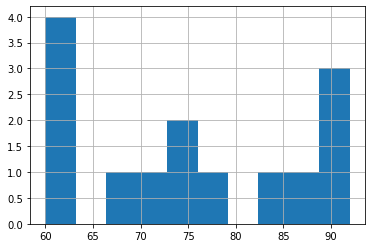

In [25]:
o3_df['value'].hist()

### CO, NO, NO2 and Traffic

In [26]:
co_df = df_clean[df_clean['id'].str.startswith('QA00CO')]
no_df = df_clean[df_clean['id'].str.startswith('QA00NO')]
no2_df = df_clean[df_clean['id'].str.startswith('QA0NO2')]
traffic_df = df_clean[df_clean['id'].str.startswith('CT0TM')]

<AxesSubplot:xlabel='lng', ylabel='lat'>

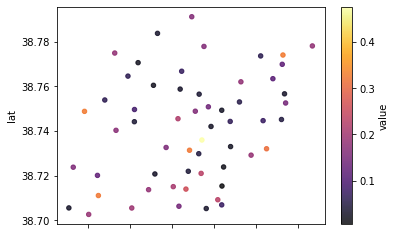

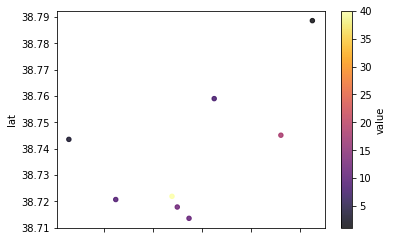

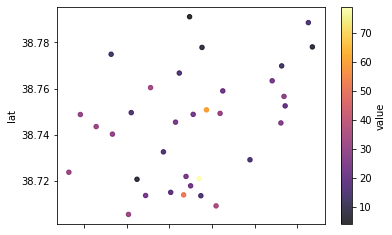

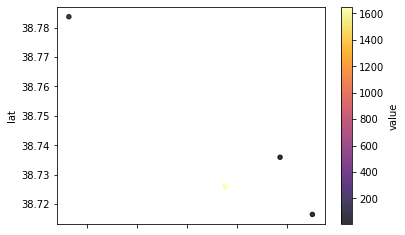

In [27]:
co_df.plot(kind='scatter', x='lng', y='lat', c='value', cmap='inferno', colorbar=True, alpha=0.8, figsize=(6,4))
no_df.plot(kind='scatter', x='lng', y='lat', c='value', cmap='inferno', colorbar=True, alpha=0.8, figsize=(6,4))
no2_df.plot(kind='scatter', x='lng', y='lat', c='value', cmap='inferno', colorbar=True, alpha=0.8, figsize=(6,4))
traffic_df.plot(kind='scatter', x='lng', y='lat', c='value', cmap='inferno', colorbar=True, alpha=0.8, figsize=(6,4))

### Particles

In [28]:
pm10_df = df_clean[df_clean['id'].str.startswith('QAPM10')]
pm25_df = df_clean[df_clean['id'].str.startswith('QAPM25')]
pm10_df.sort_values(by='value', ascending=False).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
438,QAPM100062,1h,1976-05-28 04:52:11.500,UTC,1443.0,µg/m3,Estrada do Paço do Lumiar,"{'x': -90645.0483, 'y': -99147.4463, 'z': 0, '...",38.770542,-9.176126
517,QAPM100073,1h,1976-05-28 04:52:11.500,UTC,21.0,µg/m3,Rua Alferes Malheiro,"{'x': -87078.9361, 'y': -100471.4716, 'z': 0, ...",38.758976,-9.134931
488,QAPM100069,1h,1976-05-28 04:52:11.500,UTC,17.0,µg/m3,Calçada de Carriche,"{'x': -89823, 'y': -97701, 'z': 0, 'lat': 38.7...",38.783654,-9.166856
175,QAPM100029,1h,1976-05-28 04:52:11.500,UTC,16.0,µg/m3,Avenida Fontes Pereira de Melo,"{'x': -88178, 'y': -103699, 'z': 0, 'lat': 38....",38.729798,-9.147163
72,QAPM100012,1h,1976-05-28 04:52:11.500,UTC,16.0,µg/m3,Rua de São Bento,"{'x': -88730.0222, 'y': -105450.5565, 'z': 0, ...",38.713967,-9.153286


In [29]:
pm25_df.sort_values(by='value', ascending=False).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
437,QAPM250062,1h,1976-05-28 04:52:11.500,UTC,606.0,µg/m3,Estrada do Paço do Lumiar,"{'x': -90645.0483, 'y': -99147.4463, 'z': 0, '...",38.770542,-9.176126
516,QAPM250073,1h,1976-05-28 04:52:11.500,UTC,7.0,µg/m3,Rua Alferes Malheiro,"{'x': -87078.9361, 'y': -100471.4716, 'z': 0, ...",38.758976,-9.134931
71,QAPM250012,1h,1976-05-28 04:52:11.500,UTC,7.0,µg/m3,Rua de São Bento,"{'x': -88730.0222, 'y': -105450.5565, 'z': 0, ...",38.713967,-9.153286
409,QAPM250059,1h,1976-05-28 04:52:11.500,UTC,6.0,µg/m3,Parque da Vinha - Estação Meteorológica,"{'x': -86390.3012, 'y': -100146.7938, 'z': 0, ...",38.761968,-9.127050
487,QAPM250069,1h,1976-05-28 04:52:11.500,UTC,6.0,µg/m3,Calçada de Carriche,"{'x': -89823, 'y': -97701, 'z': 0, 'lat': 38.7...",38.783654,-9.166856


In [30]:
pm10_df.sort_values(by='value', ascending=True).head()

,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng
205,QAPM100032,1h,1976-05-28 04:52:11.500,UTC,4.0,µg/m3,Rua de Campolide,"{'x': -89530.5767, 'y': -103374.27, 'z': 0, 'l...",38.732587,-9.162757
469,QAPM100066,1h,1976-05-28 04:52:11.500,UTC,4.0,µg/m3,Rua Ilha dos Amores,"{'x': -83407.2181, 'y': -98395.952, 'z': 0, 'l...",38.778025,-9.092945
268,QAPM100042,1h,1976-05-28 04:52:11.500,UTC,4.0,µg/m3,Travessa de Francisco Rezende,"{'x': -92258.9756, 'y': -102128.3935, 'z': 0, ...",38.743527,-9.194296
165,QAPM100026,1h,1976-05-28 04:52:11.500,UTC,5.0,µg/m3,Parada Alto de São João,"{'x': -86007.1276, 'y': -103793.9521, 'z': 0, ...",38.729156,-9.122189
23,QAPM100004,1h,1976-05-28 04:52:11.500,UTC,6.0,µg/m3,Alcântara - Rua dos Lusíadas,"{'x': -90989.1053, 'y': -106364.6055, 'z': 0, ...",38.705505,-9.179135


### Mapping the Air Pollution

In [31]:
pollutants_legend = {
  'QA00NO': 'NO',
  'QA0NO2': 'NO2',
  'QA00CO': 'CO',
  'QA00O3': 'O3',
  'QA0SO2': 'SO2',
  'QAPM10': 'PM10',
  'QAPM25': 'PM25'
}

def set_pollutant(id):
  key = id[0:6]
  return pollutants_legend[key]

pollution_df['pollutant'] = pollution_df['id'].apply(lambda id: set_pollutant(id))
pollution_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,id,avg,date,dateStandard,value,unit,address,coordinates,lat,lng,pollutant
0,QAPM250001,1h,1976-05-28 04:52:11.500,UTC,4.0000,µg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692,PM25
1,QAPM100001,1h,1976-05-28 04:52:11.500,UTC,13.0000,µg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692,PM10
2,QA00CO0001,1h,1976-05-28 04:52:11.500,UTC,0.1867,mg/m3,Calçada da Ajuda,"{'x': -92781, 'y': -106663, 'z': 0, 'lat': 38....",38.702631,-9.199692,CO
7,QAPM250002,1h,1976-05-28 04:52:11.500,UTC,3.0000,µg/m3,Restelo - Rua Gonçalo Velho Cabral,"{'x': -93600.6515, 'y': -106330.6078, 'z': 0, ...",38.705538,-9.209158,PM25
8,QAPM100002,1h,1976-05-28 04:52:11.500,UTC,10.0000,µg/m3,Restelo - Rua Gonçalo Velho Cabral,"{'x': -93600.6515, 'y': -106330.6078, 'z': 0, ...",38.705538,-9.209158,PM10


In [32]:
lisbon = [38.737945, -9.142685]
map = folium.Map(location=lisbon, zoom_start=12)
lats, lngs = pollution_df.lat.to_numpy(), pollution_df.lng.to_numpy()
values = (pollution_df.value.map(str) + ' ' + pollution_df.unit).to_numpy()
pollutants = pollution_df.pollutant.to_numpy()

coords = list(zip(lats, lngs, values, pollutants))
info = {}
for coord in coords:
    if coord[0:2] in info:
        info[coord[0:2]].append(coord[2:])
    else:
        info[coord[0:2]] = []
# info = {(38.70263097, -9.199692206): [('13.0 µg/m3', 'PM10'), ('0.1867 mg/m3', 'CO')],
#         (38.70553838, -9.20915802): [('10.0 µg/m3', 'PM10'), ('0.029 mg/m3', 'CO')],
#         ... }

for coords, values in info.items():
    tooltip_content = "</br>".join([f"{v[1]}: {v[0]}" for v in values])
    folium.Marker(coords, tooltip=tooltip_content).add_to(map)

map

## Using the API

In [37]:
#url = "http://opendata-cml.qart.pt:8080/lastmeasurements"
#response = requests.get(url)
#data = response.json
#df_last = pd.read_json(json.dumps(data), keep_default_dates=False)
#df_last